# Analysis of Twitter Data

## Mining tweets
Our main goal here is to compare the popularity of programming languages that have been used in **big data** and **data analytic**, and to retrieve the tutorial links of those programming languages. 

We will do this in 3 steps:

* We will add tags to our tweets DataFrame in order to be able to manipualte the data easily.
* Target tweets that have "programming" or "tutorial" keywords.
* Extract links from the relevants tweets.

### Adding Python, Java, R, MatLab, SAS, Scala, Unix tags
First, we will create a function that checks if a specific keyword is present in a text. We will do this by using regular expressions. 

Using a Python library called "**re**", we will create a function called **word_in_text(word, text)**. This function will return *True* if a word is found in text, otherwise it returns *False*.

In [1]:
import re
def word_in_text(word, text):
    try:
        word = word.lower()
        text = text.lower()
        match = re.search(word, text)
        if match:
            return 1
        return 0
    except:
        return 0

Next, we will add these 7 columns to our tweets DataFrame.

In [2]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

tweets_data_path = 'C:\\Users\\knotsupavit\\Desktop\\jupyter\\tweets_bigData_dataAnalytic.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
count = 0
for line in tweets_file:
    try:
        count = count + 1
        tweet = json.loads(line)
        tweets_data.append(tweet)
        if count%100 == 0:
            sys.stdout.write('.')
        if count%7000 == 0:
            sys.stdout.write('\n')
    except Exception as e:
        print e
        continue
print "\n%s tweets read." % (count)
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet.get('text', None), tweets_data)
#print tweets.head(3)
tweets['python'] = tweets['text'].apply(lambda tweet: word_in_text('python', tweet))
tweets['java'] = tweets['text'].apply(lambda tweet: word_in_text('java', tweet))
tweets['r'] = tweets['text'].apply(lambda tweet: word_in_text(' r pack', tweet))
tweets['matlab'] = tweets['text'].apply(lambda tweet: word_in_text('matlab', tweet))
tweets['sas'] = tweets['text'].apply(lambda tweet: word_in_text('sas', tweet))
tweets['scala'] = tweets['text'].apply(lambda tweet: word_in_text('scala', tweet))
tweets['unix'] = tweets['text'].apply(lambda tweet: word_in_text('unix', tweet))
print tweets.head()

......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
................
92633 tweets read.
                                         

In [4]:
print tweets['python'].value_counts()[1]
print tweets['java'].value_counts()[1]
print tweets['r'].value_counts()[1]
print tweets['matlab'].value_counts()[1]
print tweets['sas'].value_counts()[1]
print tweets['scala'].value_counts()[1]
print tweets['unix'].value_counts()[1]

1244
1290
5
37
735
157
15


We then can make a simple comparaison chart by executing the following:

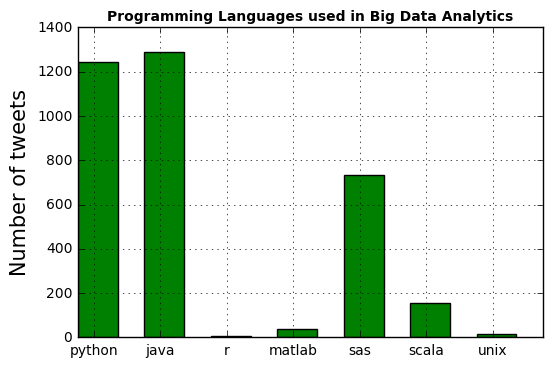

In [5]:
%matplotlib inline
keywords = ['python', 'java', 'r', 'matlab', 'sas', 'scala', 'unix']
tweets_by_keywords = [tweets['python'].value_counts()[1], \
    tweets['java'].value_counts()[1], \
    tweets['r'].value_counts()[1], \
    tweets['matlab'].value_counts()[1], \
    tweets['sas'].value_counts()[1], \
    tweets['scala'].value_counts()[1], \
    tweets['unix'].value_counts()[1]]

x_pos = list(range(len(keywords)))
width = 0.6
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_keywords, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Programming Languages used in Big Data Analytics',\
             fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(keywords)
plt.grid()

### Targeting relevant tweets
We are intersted in targetting tweets that are related to any *tutorial* or *programming* stuff that concerns the big data or data scinece. We will then create an additional column to our tweets DataFrame where we will add this information.

In [6]:
tweets['tutorial'] = tweets['text'].apply(lambda tweet: word_in_text('tutorial', tweet))
tweets[(tweets['python']==1) & (tweets['tutorial']==1)]
s = tweets[(tweets['python']==1) & (tweets['tutorial']==1)]
print len(s)
#print s

99


To easy filter the records in out dataframe **tweets**, we can also add an additional column called "*relevant*" that take value 1 if the tweet has either "Python" and "Tutorial" keyword, otherwise it takes value 0.

In [7]:
tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('python', tweet)\
    and word_in_text('tutorial', tweet))
tweets[tweets['relevant']==1]

,text,python,java,r,matlab,sas,scala,unix,tutorial,relevant
5380,Recurrent Neural Network Tutorial #4 – Impleme...,1,0,0,0,0,0,0,1,1
6401,#Numpy tutorial for data analysis https://t.co...,1,0,0,0,0,0,0,1,1
7347,#Numpy tutorial for data analysis https://t.co...,1,0,0,0,0,0,0,1,1
7348,#Numpy tutorial for data analysis https://t.co...,1,0,0,0,0,0,0,1,1
11071,RT @odsc: Recurrent Neural Network Tutorial #4...,1,0,0,0,0,0,0,1,1
12290,Step by Step tutorial in #Python for approachi...,1,0,0,0,0,0,0,1,1
12960,Basic Python Cheatsheet: https://t.co/eaYdxdBj...,1,0,0,0,0,0,0,1,1
13250,RT @odsc: Recurrent Neural Network Tutorial #4...,1,0,0,0,0,0,0,1,1
19468,RT @odsc: Recurrent Neural Network Tutorial #4...,1,0,0,0,0,0,0,1,1
21195,11 IPython Tutorials for Data Science and Mach...,1,0,0,0,0,0,0,1,1


In the same way, we can also add an additional column called "*relevant*" that take value 1 if the tweet has either "Python" and "Programming", or "Java" and "Programming", too. 

In [8]:
tweets['programming'] = tweets['text'].apply(lambda tweet:\
    (word_in_text('python', tweet) or word_in_text('java', tweet))\
    and word_in_text('programming', tweet))
tweets[tweets['programming']==1]

,text,python,java,r,matlab,sas,scala,unix,tutorial,relevant,programming
899,https://t.co/PTdiC7gmdQ #database #seo #java ...,0,1,0,0,0,0,0,0,0,1
2046,rainyamosher: Big Data Is NOT Silver Bullet - ...,0,1,0,0,0,0,0,0,0,1
2262,#Programming #JavaScript Introduction to #BigD...,0,1,0,0,0,0,0,0,0,1
2280,https://t.co/RR8nTtTHvL #database #seo #java ...,0,1,0,0,0,0,0,0,0,1
2391,RT @Programming_Lan: #java #html Introduction ...,0,1,0,0,0,0,0,0,0,1
3492,https://t.co/cEFCM85dcu #database #seo #java ...,0,1,0,0,0,0,0,0,0,1
4543,Programming with Python for Data Science | edX...,1,0,0,0,0,0,0,0,0,1
4826,https://t.co/MK8LDnfGdd #database #seo #java ...,0,1,0,0,0,0,0,0,0,1
6297,https://t.co/DgpQ9QNYRO #database #seo #java ...,0,1,0,0,0,0,0,0,0,1
7512,https://t.co/fJr6LAaTGp #database #seo #java ...,0,1,0,0,0,0,0,0,0,1


Now, we can count the number of tutorials, Python and Java programming courses, that have been found from the Twitter data.

In [9]:
print tweets['tutorial'].value_counts()[1]
print tweets[tweets['tutorial']==1]['python'].value_counts()[1]
print
print tweets['programming'].value_counts()[1]
print tweets[tweets['programming']==1]['python'].value_counts()[1]
print tweets[tweets['programming']==1]['java'].value_counts()[1]

378
99

175
9
168


We can make a comparison graph by executing the commands below:

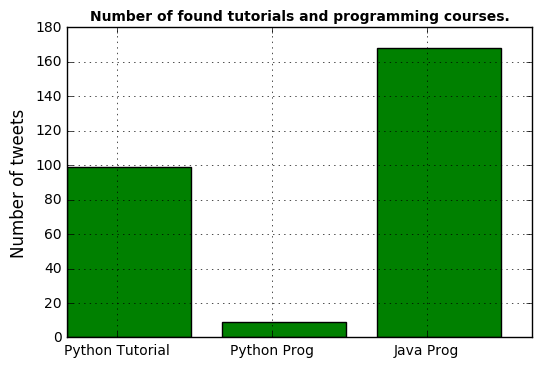

In [10]:
x_labels = ['Python Tutorial', 'Python Prog', 'Java Prog']
tweets_by = [tweets[tweets['tutorial'] == 1]['python'].value_counts()[1],\
             tweets[tweets['programming'] == 1]['python'].value_counts()[1],\
             tweets[tweets['programming'] == 1]['java'].value_counts()[1]]
x_pos = list(range(len(x_labels)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by, width,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=12)
ax.set_title('Number of found tutorials and programming courses.', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(x_labels)
plt.grid()

From the graph, we can see that our tweets (i.e., users in twitters) talk about or offer many Java stuffs for the moment.

## Extracting links from relevant tweets
Now, we will extract the relevant tweets, we want to retrieve links to any tutorials concerning big data and data science. We will start by creating a function that uses regular expressions for retrieving link that start with "http://" or "https://" from a text. This function will return the url if found, otherwise it returns an empty string.

In [11]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

Next, we will add a column called link to our tweets DataFrame. This column will contain the urls information.

In [2]:
print tweets['text']

NameError: name 'tweets' is not defined

In [12]:
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

Next we will create a new DataFrame called **tweets_relevant_with_link**. This DataFrame is a subset of tweets DataFrame and contains all relevant tweets that have a link.

In [13]:
tweets_relevant = tweets[tweets['tutorial'] == 1]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

We can now print out all links for Python tutorials by executing the commands below:

In [14]:
print tweets_relevant_with_link[tweets_relevant_with_link['python'] == 1]['link']

5380                 https://t.co/8xJhfh6lw4…
6401                  https://t.co/JhPRzuW1rC
7347                  https://t.co/B42M7Km9JC
7348                  https://t.co/YscZYpEulY
11071                https://t.co/8xJhfh6lw4…
12290                 https://t.co/NSQfRZOh7C
12960                 https://t.co/eaYdxdBjDz
13250                https://t.co/8xJhfh6lw4…
19468                https://t.co/8xJhfh6lw4…
21195                 https://t.co/yoPAv9Z2vu
22663                 https://t.co/dpcxykdert
22709               https://t.co/i1ysDWQhPd …
22788                 https://t.co/YUmb63oVXx
22817                https://t.co/8xJhfh6lw4…
38204                https://t.co/8xJhfh6lw4…
41356                 https://t.co/dmSn4ILn55
46477                 https://t.co/asZR40hBeK
50121                 https://t.co/8blBWdOIwf
51121                 https://t.co/n2qnV52jHd
59343                 https://t.co/3U1tcbFQsV
61880                 https://t.co/TdynxF7Xnm
61891                 https://t.co